***

<div align="center">
  <h3> Desarrollo de un gestor de inteligencia colectiva y un marco de trabajo para el aprendizaje a través de la resolución colaborativa de      problemas en entornos educativos transmediales </h3>
  <h4> Reporte técnico de Análisis de Datos. </h4>
  <h5> Visualización de los Datos obtenidos en la primera iteración del Gestor de Inteligencia Colectiva GIANT </h5>
  <h3> RT - 010 </h3>
  <h3> JOHN FABER FLÓREZ VASCO - MÓDULO DE DATOS - GIANT </h3>
</div>

***

<p style='text-align: justify;'> 

<div align="center">
  <h2> 1. IMPORTANDO PAQUETES Y CONFIGURACIÓN DEL ENTORNO  </h2>
</div>

</p>

In [1]:
import Pkg; 
Pkg.add("Pkg")
using Pkg;

   Updating registry at `~/.julia/registries/General`
   Updating registry at `~/.julia/registries/JuliaComputingRegistry`
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [9]:
# Cargando los paquetes instalados
using DataFrames
using CSV
using Plots
using Statistics
using StatsPlots
using StatsBase
using Lathe
using Clustering #Métodos para la agrupación de datos y evaluación de la calidad de la agrupación.
using Distances
using Dates
gr()

Plots.GRBackend()

<div align="center">
  <h2> 2. CARGANDO LOS DATOS  </h2>
</div>

In [122]:
# Se van a leer los datos usando un Archivo tipo CSV y lo vamos a convertir en un DataFrame 
eventsDataFrame = DataFrame(CSV.File("events_data_09_10_2020.csv"))
first(eventsDataFrame,5)


,_id,id,eventname
,String,Int64,String
1,5f7fa802d706e40192c3bfbb,1,\\giant\\event\\extended_challenge_team_viewed
2,5f7fa802d706e40192c3bfbc,2,\\core\\event\\user_login_failed
3,5f7fa802d706e40192c3bfbd,3,\\core\\event\\user_loggedin
4,5f7fa802d706e40192c3bfbe,4,\\core\\event\\dashboard_viewed
5,5f7fa802d706e40192c3bfbf,5,\\core\\event\\course_viewed


In [123]:
#Resumen del marco de los datos
println(size(eventsDataFrame))

(30020, 14)


In [124]:
#Observado los nombres de las columnas 
names(eventsDataFrame)

14-element Array{String,1}:
 "_id"
 "id"
 "eventname"
 "component"
 "action"
 "target"
 "objecttable"
 "objectid"
 "crud"
 "userid"
 "username"
 "courseid"
 "other"
 "timecreated"

<div align="center">
  <h2> 3. INGENIERÍA DE CARACTÉRISTICAS  </h2>
</div>

In [125]:
#Convirtiendo variables en tipo String
eventsDataFrame[!,[:eventname, :component, :action, :target, :crud]]=convert(Array{String}, eventsDataFrame[!,[:eventname, :component, :action, :target, :crud]])

30020×5 Array{String,2}:
 "\\giant\\event\\extended_challenge_team_viewed"  …  "extended_challenge_team"  "r"
 "\\core\\event\\user_login_failed"                   "user_login"               "r"
 "\\core\\event\\user_loggedin"                       "user"                     "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\course_viewed"                       "course"                   "r"
 "\\core\\event\\course_viewed"                    …  "course"                   "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\user_loggedin"                       "user"                     "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\user_loggedin"                    …  "user"                     "r"
 "\\core\\event\\dashboard_viewed"      

In [126]:
#Convirtiendo Timestap de la variable timecreated a formato de fecha
eventsDataFrame[!,:timecreated] = map((x) -> unix2datetime(x), eventsDataFrame[!,:timecreated]);

In [127]:
eventsDataFrame[!,[:timecreated]]

,timecreated
,DateTime
1,2020-08-12T19:16:16
2,2020-08-12T20:19:45
3,2020-08-12T20:20:23
4,2020-08-12T20:20:23
5,2020-08-12T20:20:27
6,2020-08-12T20:20:30
7,2020-08-12T20:22:53
8,2020-08-12T20:24:24
9,2020-08-12T20:39:07


In [128]:
#Convirtiendo DataTime to String 
eventsDataFrame[!,:timecreated] = map((x) -> Dates.format(x, "yyyy-mm-dd") , eventsDataFrame[!,:timecreated])

30020-element Array{String,1}:
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 "2020-08-12"
 ⋮
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"
 "2020-10-08"

In [129]:
# Agregando las columnas de año, mes y día a nuestro set de datos
eventsDataFrame=hcat(eventsDataFrame, DataFrame(reduce(vcat, permutedims.(split.(eventsDataFrame[!,:timecreated], '-'))), [:year, :month, :day]))

,_id,id,eventname
,String,Int64,String
1,5f7fa802d706e40192c3bfbb,1,\\giant\\event\\extended_challenge_team_viewed
2,5f7fa802d706e40192c3bfbc,2,\\core\\event\\user_login_failed
3,5f7fa802d706e40192c3bfbd,3,\\core\\event\\user_loggedin
4,5f7fa802d706e40192c3bfbe,4,\\core\\event\\dashboard_viewed
5,5f7fa802d706e40192c3bfbf,5,\\core\\event\\course_viewed
6,5f7fa802d706e40192c3bfc0,6,\\core\\event\\course_viewed
7,5f7fa802d706e40192c3bfc1,7,\\core\\event\\dashboard_viewed
8,5f7fa802d706e40192c3bfc2,8,\\core\\event\\dashboard_viewed
9,5f7fa802d706e40192c3bfc3,9,\\core\\event\\user_loggedin


In [130]:
names(eventsDataFrame)

17-element Array{String,1}:
 "_id"
 "id"
 "eventname"
 "component"
 "action"
 "target"
 "objecttable"
 "objectid"
 "crud"
 "userid"
 "username"
 "courseid"
 "other"
 "timecreated"
 "year"
 "month"
 "day"

In [131]:
# Creando nuevo DataFrame para empezar a generar piezas de visualización de lo que está sucediendo en el gestor
featureDataFrame=eventsDataFrame[!,[:userid, :component, :action, :target, :year, :month, :day]]

,userid,component,action,target,year,month,day
,Int64,String,String,String,SubStri…,SubStri…,SubStri…
1,78,giant,viewed,extended_challenge_team,2020,08,12
2,141,core,failed,user_login,2020,08,12
3,141,core,loggedin,user,2020,08,12
4,141,core,viewed,dashboard,2020,08,12
5,141,core,viewed,course,2020,08,12
6,141,core,viewed,course,2020,08,12
7,141,core,viewed,dashboard,2020,08,12
8,141,core,viewed,dashboard,2020,08,12
9,48,core,loggedin,user,2020,08,12


In [132]:
#IDENTIFICANDO CATEGORIAS de la variable eventname
actionID = unique(featureDataFrame[!,:action]);

27-element Array{String,1}:
 "viewed"
 "failed"
 "loggedin"
 "launched"
 "started"
 "loggedout"
 "updated"
 "liked"
 "commented"
 "selected"
 "graded"
 "submitted"
 "created"
 ⋮
 "added"
 "ended"
 "resumed"
 "uploaded"
 "unliked"
 "restarted"
 "reset"
 "assigned"
 "deleted"
 "leveledup"
 "unassigned"
 "searched"

In [133]:
# Obteniendo los tipos de acciones que ejecutan los usuarios y asignándoles un identificador a cada acción
featureDataFrame[!,:action]=replace(featureDataFrame[!,:action], Pair.(actionID, axes(actionID, 1))...);

30020-element Array{Any,1}:
 1
 2
 3
 1
 1
 1
 1
 1
 3
 1
 3
 1
 1
 ⋮
 1
 4
 1
 1
 1
 1
 4
 1
 1
 1
 1
 4

In [134]:
# Agrupando los usuarios de acuerdo a la acción realizada
groupbyAction = groupby(featureDataFrame, :action);
# Obteniendo la cantidad de acciones según su tipo
actionDataFrameCount=combine(groupbyAction, :action => sum)

,action,action_sum
,Any,Int64
1,1,21825
2,2,774
3,3,3297
4,4,6304
5,5,1350
6,6,1368
7,7,5908
8,8,2960
9,9,2169


In [136]:
#Agregando el nombre de la acción al actionDataFrame
insert!(actionDataFrameCount, 2, actionID, :action_name)

┌ Warning: `insert!(df::DataFrame, col_ind::Int, item, name::Symbol; makeunique::Bool = false)` is deprecated, use `insertcols!(df, col_ind, name => item; makeunique = makeunique)` instead.
│   caller = top-level scope at In[136]:1
└ @ Core In[136]:1


,action,action_name,action_sum
,Any,String,Int64
1,1,viewed,21825
2,2,failed,774
3,3,loggedin,3297
4,4,launched,6304
5,5,started,1350
6,6,loggedout,1368
7,7,updated,5908
8,8,liked,2960
9,9,commented,2169


In [139]:
#Organizando la matriz de frecuencia de los eventos por identificador de usuario
actionDataFrameCount=sort!(actionDataFrameCount, [:action_sum], rev= true)

,action,action_name,action_sum
,Any,String,Int64
1,1,viewed,21825
2,13,created,17537
3,4,launched,6304
4,7,updated,5908
5,14,Scored,5586
6,11,graded,5016
7,12,submitted,4224
8,3,loggedin,3297
9,18,resumed,2970


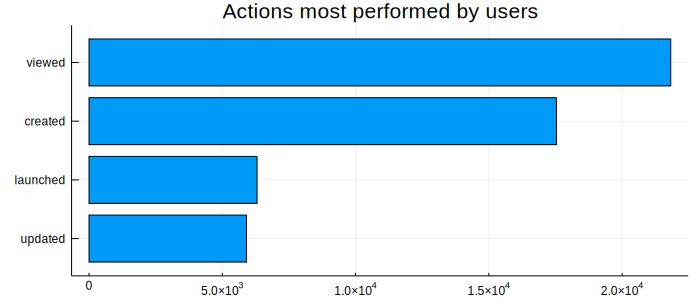

In [299]:
x=actionDataFrameCount[1:4,:action_name]
y=actionDataFrameCount[1:4,:action_sum]
plot(x, y, seriestype = :bar, size=(700,300), title = "Actions most performed by users", legend=false, orientation=:h, yflip=true)

In [329]:
#Convirtiendo variables en tipo String del feature Data Frame
featureDataFrame[!,[:year, :month, :day]]=convert(Array{String}, eventsDataFrame[!,[:year, :month, :day]]);

In [330]:
# Agrupando los usuarios de acuerdo a la acción realizada
groupbyLogin = groupby(featureDataFrame, [:month, :day, :action]);

In [331]:
# Obteniendo la cantidad de acciones según su tipo
loginataFrameCount=combine(groupbyLogin, :action => sum);

In [337]:
groupbyLoginAction = groupby(loginataFrameCount, :action);

In [378]:
groupbyLoginAction[3]


,month,day,action,action_sum
,String,String,Any,Int64
1,08,12,3,30
2,08,13,3,84
3,08,14,3,120
4,08,15,3,54
5,08,16,3,63
6,08,17,3,42
7,08,18,3,117
8,08,19,3,144
9,08,20,3,159


In [377]:
topsize=size(groupbyLoginAction[3],1);

In [379]:
describe(groupbyLoginAction[3])

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,DataType
1,month,,08,,10,3,,String
2,day,,01,,31,31,,String
3,action,3.0,3,3.0,3,1,0,Any
4,action_sum,56.8448,9,54.0,159,,,Int64


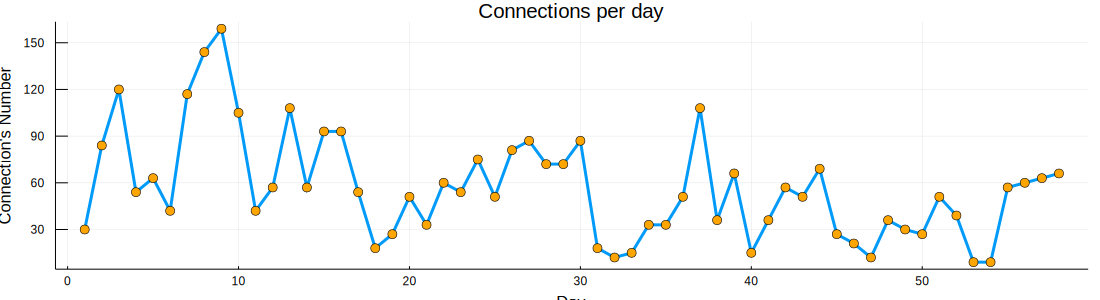

In [375]:
#Número de conexiones por día en el gestor de inteligencia GIANT
x = 1:topsize; 
y = groupbyLoginAction[3][!,:action_sum]; # These are the plotting data
plot(x, y, title = "Connections per day", xlabel = "Day", ylabel = "Connection's Number", lw = 3, marker=:circle, ms=5, mc=:orange,legend=false, size=(1100,300))